# Activity: Build a Naive Bayes model 

## Introduction

In this activity, you will build your own Naive Bayes model. Naive Bayes models can be valuable to use any time you are doing work with predictions because they give you a way to account for new information. In today's world, where data is constantly evolving, modeling with Naive Bayes can help you adapt quickly and make more accurate predictions about what could occur.

For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more. 

The data for this activity consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Your target variable is a Boolean value that indicates whether a given player will last in the league for five years. Since you previously performed feature engineering on this data, it is now ready for modeling.   

## Step 1: Imports

### Import packages

Begin with your import statements. Of particular note here are `pandas` and from `sklearn`, `naive_bayes`, `model_selection`, and `metrics`.

In [1]:
# Import relevant libraries and modules.
import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

### Load the dataset

Recall that in the lab about feature engineering, you outputted features for the NBA player dataset along with the target variable ``target_5yrs``. Data was imported as a DataFrame called `extracted_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Load extracted_nba_players_data.csv into a DataFrame called extracted_data.

extracted_data = pd.read_csv('/kaggle/input/google-adv-data-analytics-advancedml-datasets/6_extracted_nba_players_data.csv')

### Display the data

Review the first 10 rows of data.

In [3]:
# Display the first 10 rows of data.

### YOUR CODE HERE ###
extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


## Step 2: Model preparation

### Isolate your target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [4]:
# Define the y (target) variable.

### YOUR CODE HERE ###
y = extracted_data['target_5yrs']

# Define the X (predictor) variables.

### YOUR CODE HERE ###
X = extracted_data.drop('target_5yrs', axis = 1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into X and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, subset your DataFrame by using square brackets `[]` to specify which column(s) to select.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

### Display the first 10 rows of your target data

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [5]:
# Display the first 10 rows of your target data.

### YOUR CODE HERE ###

y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

**Question:** What do you observe about the your target variable?


* the target variable is binary
* it will be suitable when a binary classifier is built

In [6]:
# Display the first 10 rows of your predictor variables.

### YOUR CODE HERE ###
X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,0.435294


**Question:** What do you observe about the your predictor variables?

* all predictor variables are numeric
* we can use binary classifiers which uses numeric independent variables to estimate the targets 

### Perform a split operation on your data

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [7]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the function in the `model_selection` module of `sklearn` on the features and target variable, in order to perform the splitting.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `model_selection.train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`.

Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

### Print the shape of each output 

Print the shape of each output from your train-test split. This will verify that the split operated as expected.

In [8]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.

### YOUR CODE HERE ###
print(X_train.shape)


# Print the shape of X_test.

### YOUR CODE HERE ###
print(X_test.shape)


# Print the shape of y_train.

### YOUR CODE HERE ###
print(y_train.shape)


# Print the shape of y_test.

### YOUR CODE HERE ###
print(y_test.shape)


(1005, 10)
(335, 10)
(1005,)
(335,)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Call the attribute that DataFrames in `pandas` have to get the number of rows and number of columns as a tuple.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `shape` attribute.
</details>

**Question:** How many rows are in each of the outputs?


* X, y training vars has 1005 rows
* X, y testing vars has 335 rows

**Question:** What was the effect of the train-test split?


* training set has 70% of the original records 
* testing/validation/holdout set has 30% of the original records

## Step 3: Model building

**Question:** Which Naive Bayes algorithm should you use?

* gaussian naive bayes classifier is useful when the predictors are all numeric 

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about different implementations of the Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/supplement/1zfDy/naive-bayes-classifiers) to determine which is appropriate in this situation.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that you are performing binary classification.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You can identify the appropriate algorithm to use because you are performing a binary classification and assuming that the features of your model follow a normal distribution.
</details>

### Fit your model to your training data and predict on your test data

By creating your model, you will be drawing on your feature engineering work by training the classifier on the `X_train` DataFrame. You will use this to predict `target_5yrs` from `y_train`.

Start by defining `nb` to be the relevant algorithm from `sklearn`.`naive_bayes`. Then fit your model to your training data. Use this fitted model to create predictions for your test data.

In [9]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

### YOUR CODE HERE ###
nb = naive_bayes.GaussianNB()


# Fit the model on your training data.

### YOUR CODE HERE ###
nb.fit(X_train, y_train)


# Apply your model to predict on your test data. Call this "y_pred".

### YOUR CODE HERE ###
y_pred = nb.predict(X_test)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The appropriate implementation in this case is `naive_bayes`.`GaussianNB()`. Fit this model to your training data and predict on your test data.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `fit()`and pass your training feature set and target variable. Then call `predict()` on your test feature set.
</details>

## Step 4: Results and evaluation


### Leverage metrics to evaluate your model's performance

To evaluate the data yielded from your model, you can leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [10]:
# Print your accuracy score.

### YOUR CODE HERE ###
print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred)), print()


# Print your precision score.

### YOUR CODE HERE ###
print('precision score:'), print(metrics.precision_score(y_test, y_pred)), print()


# Print your recall score.

### YOUR CODE HERE ###
print('recall score:'), print(metrics.recall_score(y_test, y_pred)), print()


# Print your f1 score.

### YOUR CODE HERE ###
print('f1 score:'), print(metrics.f1_score(y_test, y_pred)), print()


accuracy score:
0.6895522388059702

precision score:
0.8405797101449275

recall score:
0.5858585858585859

f1 score:
0.6904761904761905



(None, None, None)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/EITmV/key-evaluation-metrics-for-classification-models) for detail on these metrics.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `metrics` module in `sklearn` has a function for computing each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test`, and `y_pred` into each function.
</details>

**Question:** What is the accuracy score for your model, and what does this tell you about the success of the model's performance?



* accuracy score: 68.96%
* approximately 69% of the targets were correctly predicted

**Question:** Can you evaluate the success of your model by using the accuracy score exclusively?


* Accuarcy only provides the overall picture of how well the model is performing
* NO, success of any model should not be considered using accuracy as a standalone metric 
* Especially in unbalanced datasets other metrics such as Precision, Recall and F1 score or F-beta score needs to be prioritized and considered depending on the use cases

**Question:** What are the precision and recall scores for your model, and what do they mean? Is one of these scores more accurate than the other?


* precision score: 0.84 --> THIS IS BETTER
* recall score: 0.59 --> THIS IS BAD


* Precision indicates us the % of correct predictions out of all those that are predicted as a particular class
* Recall tells us the proportion of an actual class being predicted correctly


* Precision is preferred when the PPV (Positive predictive value) of a model for a particular class needs to be known
* Precision is also prioritized when FPs are much more costlier/important than FNs
* Recall is prioritized when FNs are much more costlier/important than FPs

**Question:** What is the F1 score of your model, and what does this score mean?

* f1 score: 0.69 --> THIS MEANS THE MODEL IS BAD


* F1 score is a combination evaluation metric which uses both Precision and Recall
* it can be also said to be the harmonic mean of Precision and Recall
* since it is HM, the worse of Precision or Recall will get more weightage dragging the F1 score down
* F1 score helps in NOT overestimating a model when one of precision or recall is higher than the other

### Gain clarity with the confusion matrix

Recall that a confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

Create a confusion matrix based on your predicted values for the test set.

[[115  22]
 [ 82 116]]


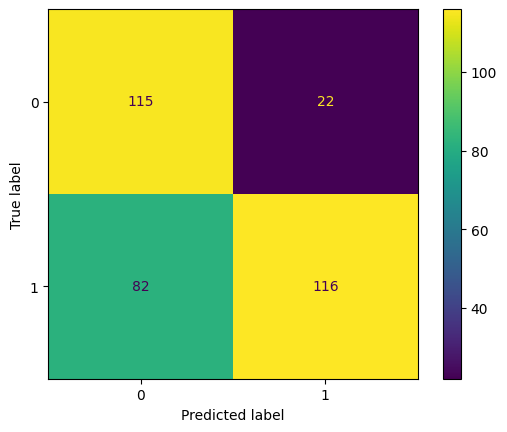

In [11]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

### YOUR CODE HERE ###
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# Create the display for your confusion matrix.

### YOUR CODE HERE ###
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= nb.classes_)


# Plot the visual in-line.

### YOUR CODE HERE ###
disp.plot()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

The `metrics` module has functions to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Then, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?


* TP = 116
* TN = 115
* FP = 22
* FN = 82


* the precision deals with FP. since the FP is less (22), Precision is high for this NB model
* the recall deals with FN. since the FN is more (82 almost 4 times FP), Recall is pretty low for this NB model

## Considerations

**What are some key takeaways that you learned from this lab?**

* finding out what type of NB suit for the problem and data at hand
* how to use and interpretat evaluation metrics and visualize confusion matrix when classfiers especially Naive Bayes is used 


**How would you present your results to your team?**

* used Gaussian NB model since the independent variables are all numeric (especially continuous)
* accuracy: 68.96% pretty low (approximately 69% of the targets were correctly predicted)
* F1-score: 0.69 pretty bad. While the precision was better at 0.84, recall is really bad at 0.59


Confusion matrix:

[[ TN=115  FP=22 ]  
 [ FN=82   TP=116]]

**How would you summarize your findings to stakeholders?**

* this is a poorly predicting model
* other classifiers can be tested against this to see if there are improvements
* This base model can be used in positively predicting most of the players who will likely play for 5 years or more while at the cost of wrongly letting players who won't be playing for more than 5 years also classified that they will 
* if there are enough resources to spend on and reward MOST players who will have careers >= 5 years and also include FEW players who won't be actually having an NBA career more than 5 years this is an OK model

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged